# W207 Final Project: Facial Keypoint Detection
#### Authors: Amy Jung, Gabriel Louis-Kayen, Jeremy Yeung, Shanie Hsieh, and Simran Sachdev
---
# Part 1: EDA and OLS

Data: https://www.kaggle.com/c/facial-keypoints-detection/data

Our project focuses on Facial Keypoints Detection, detecting and predicting the location of keypoints on face images — the fundamental building block for various applications including: 
- Tracking faces in images and videos 
- Analyzing facial expressions 
- Detecting dysmorphic facial signs for medical diagnosis 
- Biometrics / face recognition.

First, let's import our necessary packages

In [8]:
#import all necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA

---
### Data Exploration

Export training data into a Pandas dataframe

In [3]:
# df for train data
train = pd.read_csv("training.csv")
train.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


Visualize initial stats about our data. There's a total of 31 columns where 30 are the keypoints and 1 column contains the actual image. There are a total of 15 features with a column for the x-coordinate and y-coordinate for a total of those 30 columns. Our keypoints are: 
- left eye center
- right eye center
- left eye inner corner
- left eye outer corner
- right eye inner corner
- right eye outer corner
- left eyebrow inner end
- left eyebrow outer end
- right eyebrow inner end
- right eyebrow outer end
- nose tip
- mouth left corner
- mouth right corner
- mouth center top lip
- mouth center bottom lip


We see a huge drop into data for certain keypoints and shows inconsistency along the datapoints. 

In [5]:
train.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,7039.000000,7039.000000,7036.000000,7036.000000,2271.000000,2271.000000,2267.000000,2267.000000,2268.000000,2268.000000,...,7049.000000,7049.000000,2269.000000,2269.000000,2270.000000,2270.000000,2275.000000,2275.000000,7016.000000,7016.000000
mean,66.359021,37.651234,30.306102,37.976943,59.159339,37.944752,73.330478,37.707008,36.652607,37.989902,...,48.374186,62.715884,63.285735,75.970714,32.900404,76.179768,47.975412,72.919443,48.569472,78.970146
std,3.448233,3.152926,3.083230,3.033621,2.690354,2.307332,3.405852,2.881438,2.350268,2.311907,...,4.280038,5.720567,4.079063,4.579724,3.964552,4.417814,3.323060,5.222500,4.269961,5.407844
min,22.763345,1.616512,0.686592,4.091264,19.064954,27.190098,27.571879,26.250023,5.751046,26.250023,...,12.944699,17.932414,22.923362,57.023258,2.245766,56.690208,12.605173,56.719043,12.536477,25.850503
25%,65.082895,35.900451,28.783339,36.327681,58.039339,36.626283,71.716503,36.085523,35.506126,36.766783,...,46.602370,59.292697,61.257143,72.875707,30.797646,73.256472,46.494571,69.396748,46.573703,75.549715
50%,66.497566,37.528055,30.251378,37.813273,59.304615,37.878040,73.247824,37.639015,36.651562,37.944075,...,48.424713,63.451421,63.178286,75.778689,32.982305,76.000592,47.905490,72.605173,48.594978,78.696326
75%,68.024752,39.258449,31.768334,39.566729,60.519810,39.260348,75.015645,39.373489,37.753571,39.192917,...,50.330437,66.492686,65.376243,78.879123,35.101302,78.956357,49.296488,76.221644,50.677631,82.233993
max,94.689280,80.502649,85.039381,81.270911,84.440991,66.562559,95.258090,64.618230,70.714966,69.808803,...,89.438592,95.935644,84.767123,94.673637,74.017993,95.510678,83.989082,94.548359,89.438592,95.808983


Let's see an example image from our dataset:

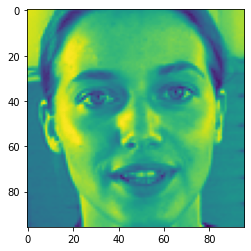

In [7]:
# example image
img = train.loc[20,"Image"].split()
img = np.array([int(i) for i in img])
plt.imshow(img.reshape(96, 96))

Due to the inconsistency along the data, we decided to split our data into 2 dataframes to model on in order to not completely disgard all of our data points. Our first dataframe contains all facial keypoints of 15 features. This dataframe dropped about 5,000 datapoints from our original dataset however.

In [8]:
# excluding the columns with 7000 values, we drop 135 rows
train_all = train.dropna()
train_all.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,...,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000
mean,66.221549,36.842274,29.640269,37.063815,59.272128,37.856014,73.412473,37.640110,36.603107,37.920852,...,47.952141,57.253926,63.419076,75.887660,32.967365,76.134065,48.081325,72.681125,48.149654,82.630412
std,2.087683,2.294027,2.051575,2.234334,2.005631,2.034500,2.701639,2.684162,1.822784,2.009505,...,3.276053,4.528635,3.650131,4.438565,3.595103,4.259514,2.723274,5.108675,3.032389,4.813557
min,47.835757,23.832996,18.922611,24.773072,41.779381,27.190098,52.947144,26.250023,24.112624,26.250023,...,24.472590,41.558400,43.869480,57.023258,9.778137,56.690208,32.260312,56.719043,33.047605,57.232296
25%,65.046300,35.468842,28.472224,35.818377,58.113054,36.607950,71.741978,36.102409,35.495730,36.766783,...,46.495330,54.466000,61.341291,72.874263,30.879288,73.280038,46.580004,69.271669,46.492000,79.417480
50%,66.129065,36.913319,29.655440,37.048085,59.327154,37.845220,73.240045,37.624207,36.620735,37.920336,...,47.900511,57.638582,63.199057,75.682465,33.034022,75.941985,47.939031,72.395978,47.980854,82.388899
75%,67.332093,38.286438,30.858673,38.333884,60.521492,39.195431,74.978684,39.308331,37.665280,39.143921,...,49.260657,60.303524,65.302398,78.774969,35.063575,78.884031,49.290000,75.840286,49.551936,85.697976
max,78.013082,46.132421,42.495172,45.980981,69.023030,47.190316,87.032252,49.653825,47.293746,44.887301,...,65.279654,75.992731,84.767123,94.673637,50.973348,93.443176,61.804506,93.916338,62.438095,95.808983


Let's take a look at some initial stats on this big dataset of all the facial keypoints.

In [9]:
# Document count mean and std of our train data
train_summary = train_all.describe()
train_transpose = train_summary.transpose()
train_transpose[['count', 'mean', 'std']]

,count,mean,std
left_eye_center_x,2140.0,66.221549,2.087683
left_eye_center_y,2140.0,36.842274,2.294027
right_eye_center_x,2140.0,29.640269,2.051575
right_eye_center_y,2140.0,37.063815,2.234334
left_eye_inner_corner_x,2140.0,59.272128,2.005631
left_eye_inner_corner_y,2140.0,37.856014,2.034500
left_eye_outer_corner_x,2140.0,73.412473,2.701639
left_eye_outer_corner_y,2140.0,37.640110,2.684162
right_eye_inner_corner_x,2140.0,36.603107,1.822784
right_eye_inner_corner_y,2140.0,37.920852,2.009505


Here is an example of an image from our dataset with the 15 facial keypoints marked on the image:

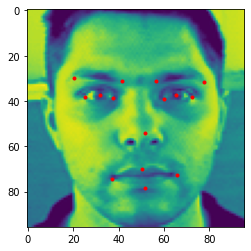

In [10]:
# Plot one of our train images and the 15 facial keypoints identifies for that image
img = train_all.loc[3,"Image"].split()
img = np.array([int(i) for i in img])
plt.plot(train.left_eye_center_x[3], train.left_eye_center_y[3], marker='.', color="red")
plt.plot(train.right_eye_center_x[3], train.right_eye_center_y[3], marker='.', color="red")
plt.plot(train.left_eye_inner_corner_x[3], train.left_eye_inner_corner_y[3], marker='.', color="red")
plt.plot(train.left_eye_outer_corner_x[3], train.left_eye_outer_corner_y[3], marker='.', color="red")
plt.plot(train.right_eye_inner_corner_x[3], train.right_eye_inner_corner_y[3], marker='.', color="red")
plt.plot(train.right_eye_outer_corner_x[3], train.right_eye_outer_corner_y[3], marker='.', color="red")
plt.plot(train.left_eyebrow_inner_end_x[3], train.left_eyebrow_inner_end_y[3], marker='.', color="red")
plt.plot(train.left_eyebrow_outer_end_x[3], train.left_eyebrow_outer_end_y[3], marker='.', color="red")
plt.plot(train.right_eyebrow_inner_end_x[3], train.right_eyebrow_inner_end_y[3], marker='.', color="red")
plt.plot(train.right_eyebrow_outer_end_x[3], train.right_eyebrow_outer_end_y[3], marker='.', color="red")
plt.plot(train.nose_tip_x[3], train.nose_tip_y[3], marker='.', color="red")
plt.plot(train.mouth_left_corner_x[3], train.mouth_left_corner_y[3], marker='.', color="red")
plt.plot(train.mouth_right_corner_x[3], train.mouth_right_corner_y[3], marker='.', color="red")
plt.plot(train.mouth_center_top_lip_x[3], train.mouth_center_top_lip_y[3], marker='.', color="red")
plt.plot(train.mouth_center_bottom_lip_x[3], train.mouth_center_bottom_lip_y[3], marker='.', color="red")

plt.imshow(img.reshape(96, 96))

Now we process our second data from containing the 4 features with a bulk of the datapoints. We were able to retain around 7,000 datapoints with only 49 rows that were dropped from the original dataframe.

In [4]:
# Dataset of the 4 keypoints that all 7000
selected_columns = train[["left_eye_center_x", "left_eye_center_y", "right_eye_center_x", "right_eye_center_y", "nose_tip_x", "nose_tip_y", "mouth_center_bottom_lip_x", "mouth_center_bottom_lip_y", "Image"]]
train_4 = selected_columns.copy()
# drop 49 rows
train_4 = train_4.dropna()
train_4.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,nose_tip_x,nose_tip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,66.349400,37.618104,30.303407,37.942656,48.372452,62.682027,48.571676,78.975710
std,3.377149,3.036592,2.948946,2.884111,4.171588,5.621675,4.237941,5.407683
min,22.763345,1.616512,0.686592,4.091264,12.944699,17.932414,12.536477,25.850503
25%,65.082412,35.897951,28.788607,36.326021,46.610759,59.304250,46.582199,75.555473
50%,66.490445,37.521582,30.252292,37.807311,48.424901,63.452070,48.595419,78.698200
75%,68.019111,39.240560,31.766950,39.555408,50.326257,66.485677,50.676650,82.234908
max,94.689280,80.502649,85.039381,81.270911,89.438592,88.825658,89.438592,95.808983


Let's take a look at some initial stats on this smaller dataset of the 4 facial keypoints as well.

In [11]:
train_4_summary = train_4.describe()
train_4_transpose = train_4_summary.transpose()
train_4_transpose[['count', 'mean', 'std']]

,count,mean,std
left_eye_center_x,7000.0,66.349400,3.377149
left_eye_center_y,7000.0,37.618104,3.036592
right_eye_center_x,7000.0,30.303407,2.948946
right_eye_center_y,7000.0,37.942656,2.884111
nose_tip_x,7000.0,48.372452,4.171588
nose_tip_y,7000.0,62.682027,5.621675
mouth_center_bottom_lip_x,7000.0,48.571676,4.237941
mouth_center_bottom_lip_y,7000.0,78.975710,5.407683


Here is an example of an image from our dataset with the 4 facial keypoints marked on the image:

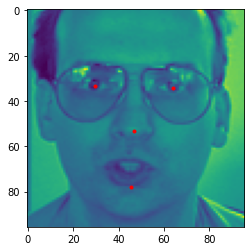

In [13]:
img = train_4.loc[6,"Image"].split()
img = np.array([int(i) for i in img])
plt.plot(train.left_eye_center_x[6], train.left_eye_center_y[6], marker='.', color="red")
plt.plot(train.right_eye_center_x[6], train.right_eye_center_y[6], marker='.', color="red")
plt.plot(train.nose_tip_x[6], train.nose_tip_y[6], marker='.', color="red")
plt.plot(train.mouth_center_bottom_lip_x[6], train.mouth_center_bottom_lip_y[6], marker='.', color="red")

plt.imshow(img.reshape(96, 96))

Our dataset source also provided a test dataset so we decided to take a look at the components. We discovered that the test dataframe that was provided contained only image pixel data and it might not be something we could incorporate in our prediction modeling but could be useful for seeing if our models could actually be used for facial detections.

In [12]:
test = pd.read_csv("test.zip")
test.head()

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


Here's an example image for the test dataset provided:

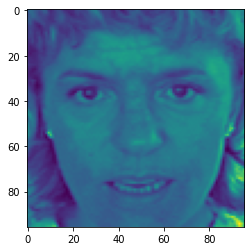

In [16]:
img = test.loc[1,"Image"].split()
img = np.array([int(i) for i in img])
plt.imshow(img.reshape(96, 96))

# Linear Regression

During our first attempt using OLS, we regressed each Keypoint on all of the other Keypoints. We want N different multiple linear regressions, where N is the number of facial keypoints, so we attempt OLS on the 4 feature dataframe where it could be easier to determine results first on less models. By regressing each keypoint on the other keypoints, we could produce predictions for the 15 feature dataframe

In [18]:
# linear regression from one key feature on all other features for dataset with 4 keypoint features
# empty lists to store results
LR_4_models = []
accuracies_LR_4 = []
# drop "Image" column since not needed in this regression
train_4_LR = train_4.drop(columns=['Image'])
# split data into train and test
train_model_LR_4, test_model_LR_4 = train_test_split(train_4_LR, test_size=0.2)

# model for each feature
for feature in train_4_LR.columns:
    # choose y being the one feature to regress on x being the other features
    y_LR_train = train_model_LR_4[feature]
    x_LR_train = train_model_LR_4.drop(columns=[feature])

    #fit the model and add to list
    model = sm.OLS(y_LR_train, x_LR_train).fit()
    print(model.summary())
    LR_4_models.append(model)
    
    # choose x being the other features to predict for y being the feature we are predicting
    y_LR_test = test_model_LR_4[feature]
    x_LR_test = test_model_LR_4.drop(columns=[feature])

    # predict accuracy on test
    y_LR_pred = model.predict(x_LR_test)
    accuracy = metrics.explained_variance_score(y_LR_test, y_LR_pred)
    accuracies_LR_4.append(accuracy)
    print('')    
    print("The accuracy of this model is: " + str(accuracy))
    print('')
    print('')
    print('')


                                 OLS Regression Results                                
Dep. Variable:      left_eye_center_x   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          4.770e+05
Date:                Fri, 03 Dec 2021   Prob (F-statistic):                        0.00
Time:                        20:53:23   Log-Likelihood:                         -13543.
No. Observations:                5600   AIC:                                  2.710e+04
Df Residuals:                    5593   BIC:                                  2.715e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

Here we try the OLS on our 15 feature dataset:

In [19]:
# linear regression from one key feature on all other features for dataset with 15 features
# empty lists to store results
LR_all_models = []
accuracies_LR_all = []
# drop "Image" column since not needed in this regression
train_LR = train_all.drop(columns=['Image'])
# split data into train and test
train_model_LR_all, test_model_LR_all = train_test_split(train_LR, test_size=0.2)

# model for each feature
for feature in train_LR.columns:
    # choose y being the one feature to regress on x being the other features
    y_LR_train = train_model_LR_all[feature]
    x_LR_train = train_model_LR_all.drop(columns=[feature])

    #fit the model and add to list
    model = sm.OLS(y_LR_train, x_LR_train).fit()
    print(model.summary())
    LR_all_models.append(model)
    
    # choose x being the other features to predict for y being the feature we are predicting
    y_LR_test = test_model_LR_all[feature]
    x_LR_test = test_model_LR_all.drop(columns=[feature])

    # predict accuracy on test
    y_LR_pred = model.predict(x_LR_test)
    accuracy = metrics.explained_variance_score(y_LR_test, y_LR_pred)
    accuracies_LR_all.append(accuracy)
    print('')    
    print("The accuracy of this model is: " + str(accuracy))
    print('')
    print('')
    print('')


                                 OLS Regression Results                                
Dep. Variable:      left_eye_center_x   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          5.223e+05
Date:                Fri, 03 Dec 2021   Prob (F-statistic):                        0.00
Time:                        20:53:23   Log-Likelihood:                         -1815.7
No. Observations:                1712   AIC:                                      3689.
Df Residuals:                    1683   BIC:                                      3847.
Df Model:                          29                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

We found some contraints to this approach, however. First, the test data provided does not have facial keypoints so by modeling keypoints to keypoints would not be helpful in prediction on a clean image with no prior keypoint detection.

We decided a better approach is for keypoints to be based off of image pixels. We decided to try OLS regressing each keypoint on the pixels. Again, we want N different multiple linear regressions, where N is the number of facial keypoints so we attempt with the 4 feature dataset first to look at less models. 

Since we're regressing off of each image pixel, we needed to reformat the "Image" column from our data set since it contains an array of numbers in one column

In [7]:
train_4["Image"].head()

0    238 236 237 238 240 240 239 241 241 243 240 23...
1    219 215 204 196 204 211 212 200 180 168 178 19...
2    144 142 159 180 188 188 184 180 167 132 84 59 ...
3    193 192 193 194 194 194 193 192 168 111 50 12 ...
4    147 148 160 196 215 214 216 217 219 220 206 18...
Name: Image, dtype: object

We decided we want to make a new dataframe for the pixels where each column is 1 pixel. Essentially, our 96x96 image should contain 9,216 pixels, so we want 9,216 columns.

In [5]:
# TAKES 8 HOURS TO RUN
# attempts to make a new datafrom with each row a datapoint and a column for each pixel. aka 7000 x 9216

# pixels_train_4 = train_4
# pixels_train_4[[str(i) for i in np.arange(9216)]] = pixels_train_4['Image'].str.split(' ', expand = True)
# pixels_train_4

# better, more efficient approach
# Transform all image data to correct shape
train_data = []
for img in train_4.dropna(axis=0).Image:
    img = img.split()
    img = [int(i) for i in img]
    img = np.array(img)
    train_data.append(img)
train_data = np.array(train_data)

Now we want to split our data to train and test for the data as well as the labels, where the data is the pixels and the labels are the keypoints we want to use. 

In [6]:
train_labels = train_4.iloc[:, :8].to_numpy()

# train test split
train_model_data, test_model_data = train_test_split(train_data, test_size=0.2)
train_model_labels, test_model_labels = train_test_split(train_labels, test_size=0.2)

print(train_model_data.shape, train_model_data.shape)
print(test_model_data.shape, test_model_data.shape)

(5600, 9216) (5600, 9216)
(1400, 9216) (1400, 9216)


Now, we're ready to regress on the pixels for each keypoint. We want to perform OLS for each keypoint and then find the mean absolute error for each keypoint to see how well the model performs. 
NOTE: This took quite a while to run for just 8 keypoints so if we used 3 keypoints, this cell might have taken a couple hours to complete.

In [9]:
# use OLS to predict x-coords and y-coords of each keypoint
# empty lists to store the results of each keypoint
results_total = []
train_mae_total = []
test_mae_total = []

# go through a regression for each keypoint of our 4 feature dataset.
for keypoint_idx in range(8):
    
    # extract the keypoint from out labels that we are regressing the pixels on
    train_single_label = train_model_labels[:,keypoint_idx]
    test_single_label = test_model_labels[:,keypoint_idx]

    # fit the model and store into list
    Y = train_single_label
    X = train_model_data
    # X = sm.add_constant(X)
    model = sm.OLS(Y, X)
    results = model.fit()
    results_total.append(results)

    # print train and test mae for all keypoints
    mae_train = mean_absolute_error(train_single_label, results.predict(train_model_data))
    mae_test = mean_absolute_error(test_single_label, results.predict(test_model_data))
    train_mae_total.append(mae_train)
    test_mae_total.append(mae_test)
    print("keypoint:", train_4.columns[keypoint_idx])
    print("train mae:", mae_train)
    print("test mae:", mae_test)
    print()

keypoint: left_eye_center_x
train mae: 0.1950944729272679
test mae: 26.981871524033746

keypoint: left_eye_center_y
train mae: 0.20017868028380356
test mae: 16.334159182381317

keypoint: right_eye_center_x
train mae: 0.19945562589246213
test mae: 13.43842883310392

keypoint: right_eye_center_y
train mae: 0.19620124126766247
test mae: 15.96407471876395

keypoint: nose_tip_x
train mae: 0.26430886556213046
test mae: 20.89620718780427

keypoint: nose_tip_y
train mae: 0.4296691067039168
test mae: 27.22399880120194

keypoint: mouth_center_bottom_lip_x
train mae: 0.2690879452726347
test mae: 20.989858739001836

keypoint: mouth_center_bottom_lip_y
train mae: 0.41873803727828957
test mae: 33.6543199387596



Let's look at the mean absolute error averages:

In [17]:
print(sum(train_mae_total)/8)
print(sum(test_mae_total)/8)

0.27159174689852095
21.93536486563132


Let's see how our model performs on the test data we created. 

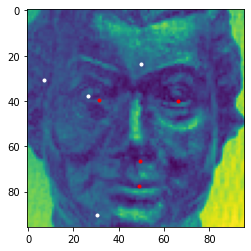

In [10]:
img_num = 5
img = test_model_data[img_num]

# plot predicted keypoints 
y_pred_keypoint = []
x_pred_keypoint = []
for i, results in enumerate(results_total):
    if i % 2 == 0: # even
        x_pred_keypoint.append(results.predict(img))
    else:
        y_pred_keypoint.append(results.predict(img))
plt.scatter(x_pred_keypoint, y_pred_keypoint, marker=".", color = 'white')

#plot actual keypoints
y_keypoint = []
x_keypoint = []
for i in range(8):
    if i % 2 == 0: # even
        x_keypoint.append(test_model_labels[img_num][i])
    else:
        y_keypoint.append(test_model_labels[img_num][i])
plt.scatter(x_keypoint, y_keypoint, marker=".", color = 'red')

plt.imshow(img.reshape(96, 96))

Now let's see how our model performs on the train data we created. 

[array([69.01218993]), array([30.08029468]), array([46.49473381]), array([46.26978993])] [array([39.70861813]), array([37.78129727]), array([66.99632806]), array([80.18237698])]


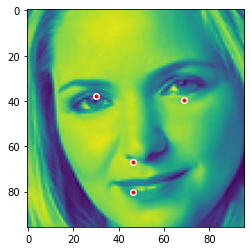

In [12]:
img_num = 50
img = train_model_data[img_num]

# plot predicted keypoints 
y_pred_keypoint_train = []
x_pred_keypoint_train = []
for i, results in enumerate(results_total):
    if i % 2 == 0: # even
        x_pred_keypoint_train.append(results.predict(img))
    else:
        y_pred_keypoint_train.append(results.predict(img))
print(x_pred_keypoint_train, y_pred_keypoint_train)
plt.scatter(x_pred_keypoint_train, y_pred_keypoint_train, marker="o", color = 'white')

#plot actual keypoints
y_keypoint = []
x_keypoint = []
for i in range(8):
    if i % 2 == 0: # even
        x_keypoint.append(train_model_labels[img_num][i])
    else:
        y_keypoint.append(train_model_labels[img_num][i])
plt.scatter(x_keypoint, y_keypoint, marker=".", color = 'red')

plt.imshow(img.reshape(96, 96))

Overall, OLS is not doing a great job on predicting facial keypoints so we wanted to try PCA on our OLS models. 

In [18]:
pca = PCA(n_components=7000)
train_data_pca = pca.fit_transform(train_data)

train_labels = train_4.iloc[:, :8].to_numpy()

# train test split
train_model_data, test_model_data = train_test_split(train_data_pca, test_size=0.2)
train_model_labels, test_model_labels = train_test_split(train_data, test_size=0.2)

print(train_model_data.shape, train_model_data.shape)
print(test_model_data.shape, test_model_data.shape)

# use OLS to predict x-coords and y-coords of each keypoint
results_total = []
train_mae_total = []
test_mae_total = []

for keypoint_idx in range(8):
    
    train_single_label = train_model_labels[:,keypoint_idx]
    test_single_label = test_model_labels[:,keypoint_idx]

    # fit the model
    Y = train_single_label
    X = train_model_data
    # X = sm.add_constant(X)
    print(Y.shape)
    print(X.shape)
    model = sm.OLS(Y, X)
    results = model.fit()
    results_total.append(results)

    # print train and test mae for all keypoints
    mae_train = mean_absolute_error(train_single_label, results.predict(train_model_data))
    mae_test = mean_absolute_error(test_single_label, results.predict(test_model_data))
    train_mae_total.append(mae_train)
    test_mae_total.append(mae_test)
    print("keypoint:", train_4.columns[keypoint_idx])
    print("train mae:", mae_train)
    print("test mae:", mae_test)
    print()

(5600, 7000) (5600, 7000)
(1400, 7000) (1400, 7000)
(5600,)
(5600, 7000)
keypoint: left_eye_center_x
train mae: 5.065565476197366
test mae: 613.2226252662281

(5600,)
(5600, 7000)
keypoint: left_eye_center_y
train mae: 5.084404761911477
test mae: 598.8031783270762

(5600,)
(5600, 7000)
keypoint: right_eye_center_x
train mae: 5.111130952387581
test mae: 579.7069943096509

(5600,)
(5600, 7000)
keypoint: right_eye_center_y
train mae: 5.117142857149321
test mae: 563.5002541172047

(5600,)
(5600, 7000)
keypoint: nose_tip_x
train mae: 4.8510714285774155
test mae: 546.5452292203205

(5600,)
(5600, 7000)
keypoint: nose_tip_y
train mae: 4.709880952386646
test mae: 529.4357548716512

(5600,)
(5600, 7000)
keypoint: mouth_center_bottom_lip_x
train mae: 4.565654761910124
test mae: 513.5553678667609

(5600,)
(5600, 7000)
keypoint: mouth_center_bottom_lip_y
train mae: 4.438630952386034
test mae: 500.75579195173106



We find PCA actually does worse than our OLS model without PCA, so OLS may not be the best to predicting facial keypoints.